In [23]:
import pandas as pd

In [24]:
df = pd.read_excel("/content/Loan_Default_Dataset.xlsx")

In [25]:
df

,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,3509.4,1,0,0,1,0,5849,0.0,360,1,1,Y
1,LP001003,128.0,1,1,1,1,0,4583,1508.0,360,1,3,N
2,LP001005,66.0,1,1,0,1,1,3000,0.0,360,1,1,Y
3,LP001006,120.0,1,1,0,2,0,2583,2358.0,360,1,1,Y
4,LP001008,141.0,1,0,0,1,0,6000,0.0,360,1,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,LP002978,71.0,2,0,0,1,0,2900,0.0,360,1,3,Y
560,LP002979,40.0,1,1,3,1,0,4106,0.0,180,1,3,Y
561,LP002983,253.0,1,1,1,1,0,8072,240.0,360,1,1,Y
562,LP002984,187.0,1,1,2,1,0,7583,0.0,360,1,1,Y


In [26]:
df.isnull().sum()

,0
Loan_ID,0
LoanAmount,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
# Drop the 'Loan_ID' column as it is an identifier and not relevant for modeling
df = df.drop('Loan_ID', axis=1)

# Display the DataFrame after dropping the column
print("DataFrame after dropping 'Loan_ID' column:")
display(df.head())

DataFrame after dropping 'Loan_ID' column:


,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1,Y
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3,N
2,66.0,1,1,0,1,1,3000,0.0,360,1,1,Y
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1,Y
4,141.0,1,0,0,1,0,6000,0.0,360,1,1,Y


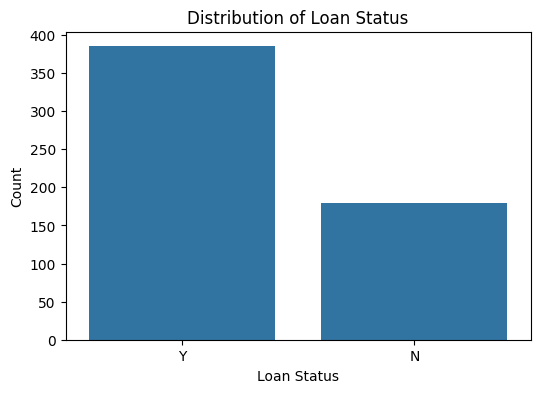

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each loan status
loan_status_counts = df['Loan_Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [30]:
# Encode 'Loan_Status' column: 'Y' as 1, 'N' as 0
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Display the updated DataFrame to show the encoding
print("DataFrame after encoding 'Loan_Status' column:")
display(df.head())

DataFrame after encoding 'Loan_Status' column:


,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1,1
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3,0
2,66.0,1,1,0,1,1,3000,0.0,360,1,1,1
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1,1
4,141.0,1,0,0,1,0,6000,0.0,360,1,1,1


In [31]:
# Define dependent variable (y)
y = df['Loan_Status']

# Define independent variables (X)
# Drop the target variable from the DataFrame to get the features
X = df.drop('Loan_Status', axis=1)

print("Dependent variable (y):")
print(y.head())

print("\nIndependent variables (X):")
display(X.head())

Dependent variable (y):
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Independent variables (X):


,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,3509.4,1,0,0,1,0,5849,0.0,360,1,1
1,128.0,1,1,1,1,0,4583,1508.0,360,1,3
2,66.0,1,1,0,1,1,3000,0.0,360,1,1
3,120.0,1,1,0,2,0,2583,2358.0,360,1,1
4,141.0,1,0,0,1,0,6000,0.0,360,1,1


Shape of original data (X, y): (564, 11) (564,)
Shape of resampled data (X_resampled, y_resampled): (770, 11) (770,)


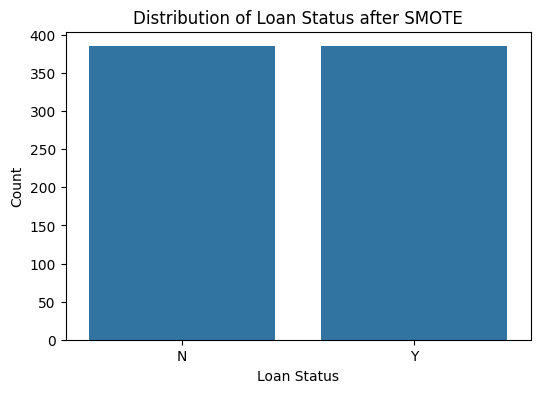

In [32]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check if X and y are defined
if 'X' not in globals() or 'y' not in globals():
    print("X or y not found. Please ensure X and y are defined before applying SMOTE.")
else:
    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("Shape of original data (X, y):", X.shape, y.shape)
    print("Shape of resampled data (X_resampled, y_resampled):", X_resampled.shape, y_resampled.shape)

    # Show the countplot of the resampled target variable
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_resampled)
    plt.title('Distribution of Loan Status after SMOTE')
    plt.xlabel('Loan Status')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['N', 'Y']) # Assuming 0 is 'N' and 1 is 'Y' based on previous encoding
    plt.show()

    # You can now use X_resampled and y_resampled for training your model.

In [33]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Shape of training data (X_train, y_train):", X_train.shape, y_train.shape)
print("Shape of testing data (X_test, y_test):", X_test.shape, y_test.shape)

Shape of training data (X_train, y_train): (616, 11) (616,)
Shape of testing data (X_test, y_test): (154, 11) (154,)


In [34]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
columns_to_scale = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the specified columns in the DataFrame X
# We fit the scaler on the training data and transform both training and testing data
# Assuming you have already split your data into X_train and X_test from previous steps.
# If not, please make sure X_train and X_test are defined.

if 'X_train' in globals() and 'X_test' in globals():
    X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    print("Data after applying Standard Scaler to specified columns:")
    display(X_train.head())
    display(X_test.head())
else:
    print("X_train and X_test not found. Please split the data into training and testing sets first.")

Data after applying Standard Scaler to specified columns:


,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
176,-0.119966,1,0,0,1,0,1.007696,-0.590533,0.273279,1,2
71,-0.185661,1,0,0,1,0,-0.289148,-0.590533,2.290936,1,1
108,-0.132848,2,1,0,1,0,-0.380791,0.366468,0.273279,1,2
86,-0.174068,1,0,0,1,0,-0.228943,-0.590533,0.273279,1,2
547,-0.090339,1,1,2,2,1,0.124742,-0.171347,0.273279,1,3


,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
698,-0.116966,1,0,0,1,0,0.441172,-0.590533,0.273279,1,1
258,-0.127695,1,0,1,2,1,-0.241518,0.426412,0.273279,0,1
184,-0.215288,1,1,1,2,0,-0.469920,0.457432,0.273279,1,2
700,-0.122180,1,0,0,1,0,0.947649,-0.590533,0.273279,1,2
680,-0.117973,1,1,0,1,0,-0.306125,0.584691,0.273279,0,1


In [35]:
import statsmodels.api as sm

# Add a constant to the independent variables (X_train) for the OLS model
X_train_ols = sm.add_constant(X_train)

# Create and fit the OLS (Logistic Regression) model
ols_model = sm.Logit(y_train, X_train_ols).fit()

# Display the model summary
print(ols_model.summary())

Optimization terminated successfully.
         Current function value: 0.446132
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  616
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Sep 2025   Pseudo R-squ.:                  0.3564
Time:                        18:50:24   Log-Likelihood:                -274.82
converged:                       True   LL-Null:                       -426.98
Covariance Type:            nonrobust   LLR p-value:                 1.076e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.6577      0.724     -6.435      0.000      -6.076      -3.239
LoanAmou

# Task
Perform stepwise regression on the training data by iteratively dropping the variable with the highest p-value (if greater than 0.05) using the OLS method, and then evaluate the final model on the test data.

## Define a function for stepwise regression

### Subtask:
Create a function to perform stepwise regression.


**Reasoning**:
Define the stepwise regression function as instructed.



In [36]:
import statsmodels.api as sm
import pandas as pd

def stepwise_regression(X, y):
    """
    Performs stepwise regression by iteratively dropping variables with p-value > 0.05.

    Args:
        X: pandas DataFrame of independent variables.
        y: pandas Series of the dependent variable.

    Returns:
        tuple: A tuple containing:
            - ols_model: The final fitted OLS model.
            - selected_features: A list of the names of the selected features.
    """
    selected_features = list(X.columns)
    while True:
        X_with_constant = sm.add_constant(X[selected_features])
        ols_model = sm.Logit(y, X_with_constant).fit()
        p_values = ols_model.pvalues.drop('const') # Drop constant p-value
        max_p_value = p_values.max()

        if max_p_value > 0.05:
            variable_to_drop = p_values.idxmax()
            selected_features.remove(variable_to_drop)
            print(f"Dropping variable: {variable_to_drop} with p-value: {max_p_value:.4f}")
        else:
            print("All remaining variables have p-value <= 0.05")
            break

    final_X_with_constant = sm.add_constant(X[selected_features])
    final_ols_model = sm.Logit(y, final_X_with_constant).fit()

    return final_ols_model, selected_features

## Perform stepwise regression

### Subtask:
Apply the stepwise regression function to your training data (X_train and y_train).


**Reasoning**:
Apply the defined stepwise regression function to the training data and store the results.



In [37]:
# Apply the stepwise_regression function
final_ols_model, selected_features = stepwise_regression(X_train, y_train)

# Print the selected features
print("\nSelected features after stepwise regression:")
print(selected_features)

Optimization terminated successfully.
         Current function value: 0.446132
         Iterations 8
Dropping variable: ApplicantIncome with p-value: 0.8608
Optimization terminated successfully.
         Current function value: 0.446157
         Iterations 8
Dropping variable: Education with p-value: 0.7418
Optimization terminated successfully.
         Current function value: 0.446246
         Iterations 8
Dropping variable: Dependents with p-value: 0.6660
Optimization terminated successfully.
         Current function value: 0.446398
         Iterations 8
Dropping variable: Loan_Amount_Term with p-value: 0.5972
Optimization terminated successfully.
         Current function value: 0.446628
         Iterations 8
Dropping variable: Property_Area with p-value: 0.5390
Optimization terminated successfully.
         Current function value: 0.446935
         Iterations 8
Dropping variable: CoapplicantIncome with p-value: 0.4396
Optimization terminated successfully.
         Current functio

## Evaluate the final model

### Subtask:
Use the selected features from the stepwise regression to train a final OLS model on the training data and evaluate its performance on the test data (X_test and y_test) using appropriate metrics.


**Reasoning**:
Select the features identified by stepwise regression from the training and testing data, add a constant to the independent variables for the OLS model, train the final OLS model, make predictions on the test set, and evaluate the model's performance using classification metrics.



Optimization terminated successfully.
         Current function value: 0.450328
         Iterations 8
Summary of the final OLS model with selected features:
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  616
Model:                          Logit   Df Residuals:                      612
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Sep 2025   Pseudo R-squ.:                  0.3503
Time:                        18:53:09   Log-Likelihood:                -277.40
converged:                       True   LL-Null:                       -426.98
Covariance Type:            nonrobust   LLR p-value:                 1.517e-64
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.1029      0.476     -8.6

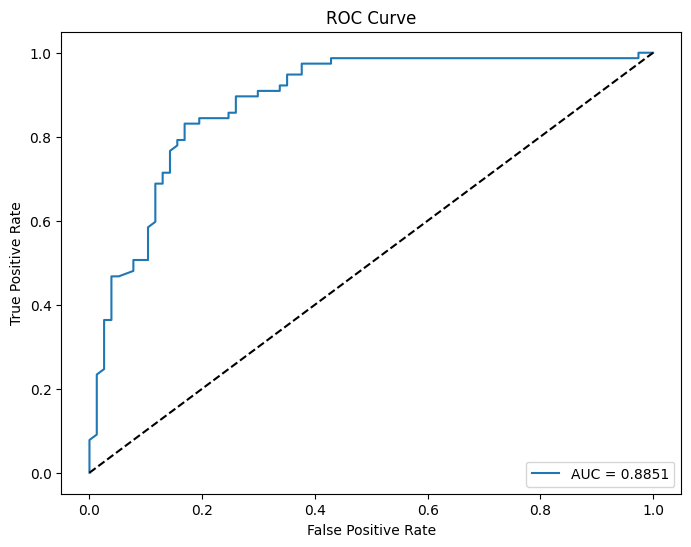

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Select the selected_features from the X_train and X_test DataFrames
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

# 2. Add a constant to X_train_reduced and X_test_reduced for the OLS model
X_train_reduced_ols = sm.add_constant(X_train_reduced)
X_test_reduced_ols = sm.add_constant(X_test_reduced)

# 3. Train a final OLS (Logistic Regression) model using sm.Logit
final_ols_model = sm.Logit(y_train, X_train_reduced_ols).fit()

# Display the summary of the final model
print("Summary of the final OLS model with selected features:")
print(final_ols_model.summary())

# 4. Make predictions on X_test_reduced using the trained model
# Get the predicted probabilities
y_pred_prob_ols = final_ols_model.predict(X_test_reduced_ols)

# Convert probabilities to binary predictions (0 or 1)
y_pred_ols = (y_pred_prob_ols > 0.5).astype(int)

# 5. Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred_ols)
precision = precision_score(y_test, y_pred_ols)
recall = recall_score(y_test, y_pred_ols)
f1 = f1_score(y_test, y_pred_ols)
auc = roc_auc_score(y_test, y_pred_prob_ols)

print("\nModel Evaluation on Test Set (with selected features):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_ols)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score
import numpy as np

# Evaluate on Training Data
print("Evaluation on Training Data:")

# Make predictions on X_train_reduced_ols
y_train_pred_prob = final_ols_model.predict(X_train_reduced_ols)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)

# Confusion Matrix (Training)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training):")
print(conf_matrix_train)

# Accuracy (Training)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"\nAccuracy (Training): {accuracy_train:.4f}")

# AUC (Training)
if all(np.isin(y_train, [0, 1])):
    auc_train = roc_auc_score(y_train, y_train_pred_prob)
    print(f"AUC (Training): {auc_train:.4f}")
else:
    print("AUC (Training) could not be calculated. y_train contains values other than 0 and 1.")

# Precision (Training)
if all(np.isin(y_train_pred, [0, 1])):
    precision_train = precision_score(y_train, y_train_pred)
    print(f"Precision (Training): {precision_train:.4f}")
else:
    print("Precision (Training) could not be calculated. y_train_pred contains values other than 0 and 1.")

# Recall (Training)
if all(np.isin(y_train_pred, [0, 1])):
    recall_train = recall_score(y_train, y_train_pred)
    print(f"Recall (Training): {recall_train:.4f}")
else:
    print("Recall (Training) could not be calculated. y_train_pred contains values other than 0 and 1.")


print("\n" + "="*30 + "\n") # Separator

# Evaluate on Test Data
print("Evaluation on Test Data:")

# Use the existing y_pred_prob_ols and y_pred_ols from cell e9bb1e75

# Confusion Matrix (Test)
conf_matrix_test = confusion_matrix(y_test, y_pred_ols)
print("Confusion Matrix (Test):")
print(conf_matrix_test)

# Accuracy (Test)
accuracy_test = accuracy_score(y_test, y_pred_ols)
print(f"\nAccuracy (Test): {accuracy_test:.4f}")

# AUC (Test)
if all(np.isin(y_test, [0, 1])):
    auc_test = roc_auc_score(y_test, y_pred_prob_ols)
    print(f"AUC (Test): {auc_test:.4f}")
else:
     print("AUC (Test) could not be calculated. y_test contains values other than 0 and 1.")


# Precision (Test)
if all(np.isin(y_pred_ols, [0, 1])):
    precision_test = precision_score(y_test, y_pred_ols)
    print(f"Precision (Test): {precision_test:.4f}")
else:
     print("Precision (Test) could not be calculated. y_pred_ols contains values other than 0 and 1.")


# Recall (Test)
if all(np.isin(y_pred_ols, [0, 1])):
    recall_test = recall_score(y_test, y_pred_ols)
    print(f"Recall (Test): {recall_test:.4f}")
else:
     print("Recall (Test) could not be calculated. y_pred_ols contains values other than 0 and 1.")

Evaluation on Training Data:
Confusion Matrix (Training):
[[183 125]
 [  9 299]]

Accuracy (Training): 0.7825
AUC (Training): 0.8427
Precision (Training): 0.7052
Recall (Training): 0.9708


Evaluation on Test Data:
Confusion Matrix (Test):
[[49 28]
 [ 4 73]]

Accuracy (Test): 0.7922
AUC (Test): 0.8851
Precision (Test): 0.7228
Recall (Test): 0.9481


In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import statsmodels.api as sm
import numpy as np

# Initialize K-Fold Cross-Validation
# You can change the number of splits (n_splits) as needed
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
auc_scores = []

# Perform K-Fold Cross-Validation
print(f"Performing {n_splits}-Fold Cross-Validation for OLS Model:")

# Use the resampled data (X_resampled, y_resampled) for cross-validation
# Ensure X_resampled and y_resampled are defined from the SMOTE step
if 'X_resampled' not in globals() or 'y_resampled' not in globals():
    print("X_resampled or y_resampled not found. Please run the SMOTE cell (lUlm5j7muBIK) first.")
else:
    X_cv = X_resampled.copy() # Use a copy to avoid modifying the original resampled data
    y_cv = y_resampled.copy()

    # Ensure selected_features are defined from the stepwise regression cell (88be8b81)
    if 'selected_features' not in globals():
        print("selected_features not found. Please run the stepwise regression cell (88be8b81) first.")
    else:
        # Select only the features identified by stepwise regression for CV
        X_cv_reduced = X_cv[selected_features]

        for fold, (train_index, test_index) in enumerate(kf.split(X_cv_reduced)):
            print(f"\n--- Fold {fold+1}/{n_splits} ---")

            # Split data into training and testing sets for the current fold
            X_train_fold, X_test_fold = X_cv_reduced.iloc[train_index], X_cv_reduced.iloc[test_index]
            y_train_fold, y_test_fold = y_cv.iloc[train_index], y_cv.iloc[test_index]

            # Add constant to the independent variables for the OLS model
            X_train_fold_ols = sm.add_constant(X_train_fold)
            X_test_fold_ols = sm.add_constant(X_test_fold)

            # Create and fit the OLS (Logistic Regression) model for the current fold
            try:
                ols_model_fold = sm.Logit(y_train_fold, X_train_fold_ols).fit(disp=0) # disp=0 to suppress optimization output

                # Make predictions on the test data for the current fold
                y_pred_prob_fold = ols_model_fold.predict(X_test_fold_ols)
                y_pred_fold = (y_pred_prob_fold > 0.5).astype(int)

                # Calculate evaluation metrics for the current fold
                accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
                precision_fold = precision_score(y_test_fold, y_pred_fold)
                recall_fold = recall_score(y_test_fold, y_pred_fold)

                # Calculate AUC for the current fold (only if y_test_fold contains both classes)
                if len(np.unique(y_test_fold)) == 2:
                     auc_fold = roc_auc_score(y_test_fold, y_pred_prob_fold)
                else:
                     auc_fold = np.nan # Assign NaN if AUC cannot be calculated

                # Append metrics to lists
                accuracy_scores.append(accuracy_fold)
                precision_scores.append(precision_fold)
                recall_scores.append(recall_fold)
                auc_scores.append(auc_fold)

                print(f"Accuracy: {accuracy_fold:.4f}")
                print(f"Precision: {precision_fold:.4f}")
                print(f"Recall: {recall_fold:.4f}")
                print(f"AUC: {auc_fold:.4f}" if not np.isnan(auc_fold) else "AUC: Cannot be calculated (only one class in test fold)")

            except Exception as e:
                print(f"An error occurred during model fitting for fold {fold+1}: {e}")
                # Append NaN or appropriate value if model fitting fails
                accuracy_scores.append(np.nan)
                precision_scores.append(np.nan)
                recall_scores.append(np.nan)
                auc_scores.append(np.nan)


# Calculate and display the mean and standard deviation of the metrics
print("\n" + "="*30)
print("Overall Cross-Validation Results:")
print(f"Mean Accuracy: {np.nanmean(accuracy_scores):.4f} (Std Dev: {np.nanstd(accuracy_scores):.4f})")
print(f"Mean Precision: {np.nanmean(precision_scores):.4f} (Std Dev: {np.nanstd(precision_scores):.4f})")
print(f"Mean Recall: {np.nanmean(recall_scores):.4f} (Std Dev: {np.nanstd(recall_scores):.4f})")
print(f"Mean AUC: {np.nanmean(auc_scores):.4f} (Std Dev: {np.nanstd(auc_scores):.4f})")

Performing 5-Fold Cross-Validation for OLS Model:

--- Fold 1/5 ---
Accuracy: 0.7727
Precision: 0.6881
Recall: 0.9868
AUC: 0.8875

--- Fold 2/5 ---
Accuracy: 0.8312
Precision: 0.7449
Recall: 0.9865
AUC: 0.8921

--- Fold 3/5 ---
Accuracy: 0.7727
Precision: 0.7222
Recall: 0.9398
AUC: 0.7858

--- Fold 4/5 ---
Accuracy: 0.7403
Precision: 0.6509
Recall: 0.9583
AUC: 0.8549

--- Fold 5/5 ---
Accuracy: 0.7727
Precision: 0.7064
Recall: 0.9625
AUC: 0.8406

Overall Cross-Validation Results:
Mean Accuracy: 0.7779 (Std Dev: 0.0294)
Mean Precision: 0.7025 (Std Dev: 0.0318)
Mean Recall: 0.9668 (Std Dev: 0.0179)
Mean AUC: 0.8522 (Std Dev: 0.0384)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np

# Ensure selected_features is defined from the stepwise regression cell (88be8b81)
if 'selected_features' not in globals():
    print("selected_features not found. Please run the stepwise regression cell (88be8b81) first.")
else:
    # Select the significant features from the training and test sets
    X_train_significant = X_train[selected_features]
    X_test_significant = X_test[selected_features]

    # Initialize the Decision Tree Classifier
    # You can tune hyperparameters like max_depth, min_samples_split, etc.
    dt_model = DecisionTreeClassifier(random_state=42)

    # Train the Decision Tree model on the training data with significant features
    dt_model.fit(X_train_significant, y_train)

    # --- Evaluate on Training Data ---
    print("Decision Tree Classifier Performance on Training Data (with significant features):")
    y_train_pred_dt = dt_model.predict(X_train_significant)
    y_train_pred_prob_dt = dt_model.predict_proba(X_train_significant)[:, 1]

    accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
    precision_train_dt = precision_score(y_train, y_train_pred_dt)
    recall_train_dt = recall_score(y_train, y_train_pred_dt)
    conf_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
    auc_train_dt = roc_auc_score(y_train, y_train_pred_prob_dt) # Assuming y_train has both classes after SMOTE


    print(f"Accuracy: {accuracy_train_dt:.4f}")
    print(f"Precision: {precision_train_dt:.4f}")
    print(f"Recall: {recall_train_dt:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix_train_dt)
    print(f"AUC: {auc_train_dt:.4f}")

    print("\n" + "="*50 + "\n") # Separator

    # --- Evaluate on Test Data ---
    print("Decision Tree Classifier Performance on Test Data (with significant features):")

    # Make predictions on the test data
    y_pred_dt = dt_model.predict(X_test_significant)
    y_pred_prob_dt = dt_model.predict_proba(X_test_significant)[:, 1] # Get probabilities for AUC

    # Evaluate the model's performance
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    precision_dt = precision_score(y_test, y_pred_dt)
    recall_dt = recall_score(y_test, y_pred_dt)
    conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

    # Calculate AUC (only if y_test contains both classes)
    if len(np.unique(y_test)) == 2:
        auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
    else:
        auc_dt = np.nan # Assign NaN if AUC cannot be calculated


    print(f"Accuracy: {accuracy_dt:.4f}")
    print(f"Precision: {precision_dt:.4f}")
    print(f"Recall: {recall_dt:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix_dt)
    print(f"\nAUC: {auc_dt:.4f}" if not np.isnan(auc_dt) else "AUC: Cannot be calculated (only one class in test data)")

Decision Tree Classifier Performance on Training Data (with significant features):
Accuracy: 0.9351
Precision: 0.9241
Recall: 0.9481
Confusion Matrix:
[[284  24]
 [ 16 292]]
AUC: 0.9880


Decision Tree Classifier Performance on Test Data (with significant features):
Accuracy: 0.7727
Precision: 0.7838
Recall: 0.7532

Confusion Matrix:
[[61 16]
 [19 58]]

AUC: 0.7992


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
import numpy as np

# Initialize the Decision Tree Classifier
# Using a random_state for reproducibility
dt_model_full = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the *full* training data (X_train, y_train)
# X_train and y_train should be defined from the train_test_split cell (65107ede)
if 'X_train' not in globals() or 'y_train' not in globals():
    print("X_train or y_train not found. Please run the train_test_split cell (65107ede) first.")
else:
    dt_model_full.fit(X_train, y_train)

    # --- Evaluate on Training Data (Full Features) ---
    print("Decision Tree Classifier Performance on Training Data (with full features):")
    y_train_pred_dt_full = dt_model_full.predict(X_train)
    y_train_pred_prob_dt_full = dt_model_full.predict_proba(X_train)[:, 1]

    accuracy_train_dt_full = accuracy_score(y_train, y_train_pred_dt_full)
    precision_train_dt_full = precision_score(y_train, y_train_pred_dt_full)
    recall_train_dt_full = recall_score(y_train, y_train_pred_dt_full)
    conf_matrix_train_dt_full = confusion_matrix(y_train, y_train_pred_dt_full)
    # Assuming y_train has both classes after SMOTE
    auc_train_dt_full = roc_auc_score(y_train, y_train_pred_prob_dt_full)


    print(f"Accuracy: {accuracy_train_dt_full:.4f}")
    print(f"Precision: {precision_train_dt_full:.4f}")
    print(f"Recall: {recall_train_dt_full:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix_train_dt_full)
    print(f"AUC: {auc_train_dt_full:.4f}")

    print("\n" + "="*50 + "\n") # Separator

    # --- Evaluate on Test Data (Full Features) ---
    print("Decision Tree Classifier Performance on Test Data (with full features):")

    # Make predictions on the test data (X_test)
    # X_test should be defined from the train_test_split cell (65107ede)
    if 'X_test' not in globals() or 'y_test' not in globals():
         print("X_test or y_test not found. Please run the train_test_split cell (65107ede) first.")
    else:
        y_pred_dt_full = dt_model_full.predict(X_test)
        y_pred_prob_dt_full = dt_model_full.predict_proba(X_test)[:, 1] # Get probabilities for AUC

        # Evaluate the model's performance
        accuracy_dt_full = accuracy_score(y_test, y_pred_dt_full)
        precision_dt_full = precision_score(y_test, y_pred_dt_full)
        recall_dt_full = recall_score(y_test, y_pred_dt_full)
        conf_matrix_dt_full = confusion_matrix(y_test, y_pred_dt_full)

        # Calculate AUC (only if y_test contains both classes)
        if len(np.unique(y_test)) == 2:
            auc_dt_full = roc_auc_score(y_test, y_pred_prob_dt_full)
        else:
            auc_dt_full = np.nan # Assign NaN if AUC cannot be calculated


        print(f"Accuracy: {accuracy_dt_full:.4f}")
        print(f"Precision: {precision_dt_full:.4f}")
        print(f"Recall: {recall_dt_full:.4f}")
        print("\nConfusion Matrix:")
        print(conf_matrix_dt_full)
        print(f"\nAUC: {auc_dt_full:.4f}" if not np.isnan(auc_dt_full) else "AUC: Cannot be calculated (only one class in test data)")

Decision Tree Classifier Performance on Training Data (with full features):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Confusion Matrix:
[[308   0]
 [  0 308]]
AUC: 1.0000


Decision Tree Classifier Performance on Test Data (with full features):
Accuracy: 0.7143
Precision: 0.7391
Recall: 0.6623

Confusion Matrix:
[[59 18]
 [26 51]]

AUC: 0.7143


Here's a comparison of the performance of the models we've trained so far and an interpretation of the results, including potential overfitting:

**1. OLS (Logistic Regression) with Significant Features (from stepwise regression):**

*   **Training Data:**
    *   Accuracy: 0.7825
    *   Precision: 0.7052
    *   Recall: 0.9708
    *   AUC: 0.8427
*   **Test Data:**
    *   Accuracy: 0.7922
    *   Precision: 0.7228
    *   Recall: 0.9481
    *   AUC: 0.8851
*   **Interpretation:** The OLS model with significant features shows consistent performance between the training and test sets, with slightly better metrics on the test set in some cases (Accuracy, Precision, AUC). This suggests that the model generalizes reasonably well and is not significantly overfitting. It has a high recall on both sets, indicating it's good at identifying positive cases ('Y' Loan Status).

**2. Decision Tree Classifier with Significant Features:**

*   **Training Data:**
    *   Accuracy: 0.9351
    *   Precision: 0.9241
    *   Recall: 0.9481
    *   AUC: 0.9880
*   **Test Data:**
    *   Accuracy: 0.7727
    *   Precision: 0.7838
    *   Recall: 0.7532
    *   AUC: 0.7992
*   **Interpretation:** The Decision Tree with significant features performs very well on the training data (high accuracy, precision, recall, and AUC). However, there is a notable drop in performance on the test data across all metrics. This is a strong indication of **overfitting**. The model has learned the training data too well, including its noise and specific patterns, and is not generalizing effectively to unseen data.

**3. Decision Tree Classifier with Full Features:**

*   **Training Data:**
    *   Accuracy: 1.0000
    *   Precision: 1.0000
    *   Recall: 1.0000
    *   AUC: 1.0000
*   **Test Data:**
    *   Accuracy: 0.7143
    *   Precision: 0.7391
    *   Recall: 0.6623
    *   AUC: 0.7143
*   **Interpretation:** The Decision Tree with *full* features achieves perfect scores on the training data (100% accuracy, precision, recall, and AUC). This is a clear sign of **severe overfitting**. The model has essentially memorized the training data. Its performance on the test data is significantly lower than on the training data, and even lower than the Decision Tree with significant features and the OLS model. This confirms that using all features without regularization or pruning in a Decision Tree led to a highly overfitted model.

**Comparison and Overfitting Summary:**

*   The **OLS model with significant features** appears to be the most balanced in terms of performance on training vs. test data, showing good generalization and no significant overfitting. It maintains a high recall on both sets.
*   Both **Decision Tree models** show signs of overfitting, particularly the one trained on full features which is severely overfitted. The Decision Tree with significant features overfits less than the one with full features, likely because the feature selection process helped to reduce complexity.

**In conclusion:** Based on these results, the **OLS model with the significant features** selected through stepwise regression appears to be the best performing model so far in terms of generalization to unseen data, especially if maintaining high recall is important. The Decision Tree models, in their current form, are overfitting the data.